In [1]:
from urllib.request import urlopen, Request
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas_datareader as pdr
import datetime as dt
from datetime import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfin
from pandas_datareader import data as pdr
%matplotlib inline

In [2]:
#rounding off
def roundof_val(l):
    for i in range(0,len(l)):
        l[i]=round(l[i],2)
    return(l)


In [3]:
stock_data=pd.read_csv('tickers_info.csv')

In [4]:
stock_data=np.array(stock_data)
stock_data

array([['reliance', 'RELI', 'RELIANCE.NS'],
       ['tatamotors', 'TTM', 'TATAMOTORS.BO'],
       ['Infoys', 'INFY', 'INFY.NS'],
       ['Wipro', 'WIT', 'WIPRO.NS'],
       ['Azure power corp lim', 'AZRE', 'AZRE'],
       ['Sify techno limited', 'SIFY', 'SIFY'],
       ['HDFC', 'HDB', 'HDB'],
       ['ICICI', 'IBN', 'IBN'],
       ['Makemytrip', 'MMYT', 'MMYT'],
       ['Dr reddy lab limited', 'RDY', 'RDY'],
       ['Wns limited', 'WNS', 'WNS'],
       ['Renew  energy', 'RNW', 'RNW']], dtype=object)

In [5]:
finviz_url='https://finviz.com/quote.ashx?t='

In [6]:
len(stock_data)

12

In [7]:
news_tables={}

In [8]:
#getting url's
l=len(stock_data)
for i in range(9,l):
    url=finviz_url+stock_data[i][1]
    req=Request(url=url,headers={'user-agent':'my-app'})
    response=urlopen(req)
    html=BeautifulSoup(response,'html')
    news_table=html.find(id='news-table')
    news_tables[stock_data[i][1]]=news_table


In [9]:
def year(m):
    if(m=='Jan'):
        return('01')
    elif(m=='Feb'):
        return('02')
    elif(m=='Mar'):
        return('03')
    elif(m=='Apr'):
        return('04')
    elif(m=='May'):
        return('05')
    elif(m=='Jun'):
        return('06')
    elif(m=='Jul'):
        return('07')
    elif(m=='Aug'):
        return('08')
    elif(m=='Sep'):
        return('09')
    elif(m=='Oct'):
        return('10')
    elif(m=='Nov'):
        return('11')
    elif(m=='Dec'):
        return('12')


In [10]:
#close of the day
def get_close(d,i,str):
    from datetime import datetime
    date_time_str = d[i]+' 01:55:19'
    x= datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    y=x-dt.timedelta(20)
    try:
        tata=pdr.get_data_yahoo(str,start=y,end=x)
        t=tata.Close.values
        t=roundof_val(t)
    except:
        t=[0,0,0,0]
    return(t[-1])

    

In [11]:
#get dates in datetime format
def get_date(dates,i):
    yy=dates[i][7:]
    
    dd=dates[i][4:6]
    dd=dd+'/'
    mm=year(dates[i][0:3])
    mm=mm+'/'
    return(dd+mm+yy)

    


In [12]:
#get high and low of consecutive days
def get_day(d,i,str):
    temp=[]
    from datetime import datetime
    date_time_str = d[i]+' 01:55:19'
    x= datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    y=x+dt.timedelta(10)
    yfin.pdr_override()
    try:
        tata=pdr.get_data_yahoo(str,start=x,end=y)
        # print(tata)
        t1=tata.High.values
        t2=tata.Low.values
        t0=tata.Close.values
        t4=tata.Open.values
        t1=roundof_val(t1)
        t2=roundof_val(t2)
        # print(t1)
        # print(t2)
        temp.append(t0[0])
        temp.append(t4[1])
        temp.append(t0[1])
        temp.append(t1[1])
        temp.append(t2[1])
        temp.append(t1[2])
        temp.append(t2[2])
        temp.append(t1[3])
        temp.append(t2[3])
        temp.append(t1[4])
        temp.append(t2[4])
        temp.append(t1[5])
        temp.append(t2[5])
    except:
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        temp.append(0)
        
    return(temp)

    

In [13]:

def maxi_mean(info):
    h=len(info)
    max=0
    i=3
    count=0
    while i<h:
        if(info[i]==0):
            break
        max=max+info[i]
        count=count+1
        i=i+2
    if count==0:
        return 0
    max=max/count
    max=round(max,2)
    return(max)



In [14]:
def mini_mean(info):
    h=len(info)
    max=0
    i=4
    count=0
    while i<h:
        if(info[i]==0):
            break
        max=max+info[i]
        count=count+1
        i=i+2
    if count==0:
        return 0
    max=max/count
    max=round(max,2)

    return(max)



In [15]:
def compare(close,max,min):
    if(abs(close-min)>abs(close-max)):
        return(-1)
    else:
        return(1)

In [16]:
def find_total(info):
    l=len(info)
    c=[0,0,0]
    for i in range(0,l):
        if(info[i]=='Neutral'):
            c[0]=c[0]+1
        elif(info[i]=='Increase'):
            c[1]=c[1]+1
        else:
            c[2]=c[2]+1
    return(c)

In [17]:
def find_predicted(compound):
    a=[]
    for i in range(0,len(compound)):
        if(compound[i]>0):
            a.append('Increase')
        elif(compound[i]<0):
            a.append('Decrease')
    return(a)
        


In [18]:
#datset for arima
def arima_data(d,i,str):
    from datetime import datetime
    date_time_str = d[i]+' 01:55:19'
    x= datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    y=x-dt.timedelta(300)
    yfin.pdr_override()
    print(y)
    print(x)
    try:
        tata=pdr.get_data_yahoo(str,start=y,end=x)
        
        
    except:
        tata=pdr.get_data_yahoo(str,start=y,end=x)
    return(tata)

In [19]:
#getting close of next day
def next_Close(d,i,str):
    from datetime import datetime
    date_time_str = d[i]+' 01:55:19'
    x= datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    y=x+dt.timedelta(5)
    try:
        tata=pdr.get_data_yahoo(str,start=x,end=y)
        t=tata.Close.values

        
    except:
        t=[0,0]
    return(t[1])


In [20]:
#getting high of next day
def next_high(d,i,str):
    from datetime import datetime
    date_time_str = d[i]+' 01:55:19'
    x= datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    y=x+dt.timedelta(5)
    try:
        tata=pdr.get_data_yahoo(str,start=x,end=y)
        t=tata.High.values

        
    except:
        t=[0,0]
    return(t[1])


In [21]:
#getting Low of next day
def next_low(d,i,str):
    from datetime import datetime
    date_time_str = d[i]+' 01:55:19'
    x= datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    y=x+dt.timedelta(5)
    try:
        tata=pdr.get_data_yahoo(str,start=x,end=y)
        t=tata.Low.values

        
    except:
        t=[0,0]
    return(t[1])


In [22]:
def percan_inc(x,y):
    a=x-y
    a=a/y
    a=a*100
    return(a)

In [23]:
def arima_pred(name,date_arr,i,nc):
    train_data=arima_data(date_arr,i,name)
    train=list(train_data[:]['Close'])
    # print("ff",train)

    model_prediction=[]
    #from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.arima.model import ARIMA
    result=adfuller(train_data.Close.dropna())
    print("AdY statistics",result[0])
    print("p-value",result[1])

    try:
        model=ARIMA(train,order=(5,1,0))
        model_fit=model.fit()
        output=model_fit.forecast()
        
        model_prediction.append(output[0])
    except:
        
        a=0
    try:    
        model=ARIMA(train,order=(4,1,0))
        model_fit=model.fit()
        output=model_fit.forecast()
        model_prediction.append(output[0])
        # model_prediction.append(list(output[0])[0])
    except:
        a=0
    try:    
        model=ARIMA(train,order=(4,1,2))
        model_fit=model.fit()
        output=model_fit.forecast()
        model_prediction.append(output[0])
        # model_prediction.append(list(output[0])[0])
    except:
        a=0
    try:
        model=ARIMA(train,order=(5,1,2))
        model_fit=model.fit()
        output=model_fit.forecast()
        model_prediction.append(output[0])
        # model_prediction.append(list(output[0])[0])
    except:
        a=0
    from statistics import mean
    
    model_prediction=list(model_prediction)
    pre=mean(model_prediction)
    if(pre<nc):
        # if(percan_inc(pre,nc)<=-1):
        #     return([pre,-1])
        # else:
        #     return([pre,0])
        return([pre,-1])
    else:
        # if(percan_inc(pre,nc)>=1):
        #     return([pre,1])
        # else:
        #     return([pre,0])
        return([pre,1])
    
    

In [24]:
def profit(inv,open,ar):
    no=int(inv/open)
    p=ar-open
    return(p*no)



In [25]:
def loss_cal(inv,open,close,low):
     no=int(inv/open)
     p=(open+low)/2
     p=open-p
     return(p*no)

In [26]:
#percantage profit calculate
def per_prof_cal(inv,act):
    p=inv-act
    p=p/act
    p=p*100
    return(p)

[*********************100%***********************]  1 of 1 completed
0
[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
9
[*********************100%***********************]  1 of 1 completed
10
[*********************100%***********************]  1 of 1 completed
11
[*********************100%***********************]  1 of 1 completed
12
[*********************100%***********************]  1 of 1 completed
13
[*

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2022-02-19 01:55:19
2022-09-07 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.3709148318353233
p-value 0.15011429033061874


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-01-29 01:55:19
2022-08-17 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.1085213776575578
p-value 0.24110194724512407


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-01-14 01:55:19
2022-08-02 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.08315115350043
p-value 0.25134335367293126


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-01-10 01:55:19
2022-07-29 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.126220055657207
p-value 0.23410290713686494


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-01-10 01:55:19
2022-07-29 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.126220055657207
p-value 0.23410290713686494


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-12-17 01:55:19
2022-07-05 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.1577087121728136
p-value 0.22195105689632916


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-12-06 01:55:19
2022-06-24 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.0450767097474603
p-value 0.26716473902794097


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-11-01 01:55:19
2022-05-20 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.2932092846553633
p-value 0.17416746697353702


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-09-08 01:55:19
2022-03-27 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.2122807734757597
p-value 0.20181847584183937


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-07-18 01:55:19
2022-02-03 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.8761182066514184
p-value 0.343377898965995


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-07-15 01:55:19
2022-01-31 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.8571948836641603
p-value 0.35245797391546674


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-05-29 01:55:19
2021-12-15 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.1942592560105416
p-value 0.6760603467737616
2021-04-30 01:55:19
2021-11-16 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -0.9104500855681287
p-value 0.7845115772751361


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-04-15 01:55:19
2021-11-01 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -0.9087376882300608
p-value 0.785081354117386


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-04-02 01:55:19
2021-10-19 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics 0.4739167390165403
p-value 0.984058380265739
2021-02-21 01:55:19
2021-09-09 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -0.7111806923503239
p-value 0.843832191744997


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-02-19 01:55:19
2021-09-07 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -0.6945393944493896
p-value 0.84815889209056
2021-02-16 01:55:19
2021-09-04 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -0.8163572320739367
p-value 0.8142699726729707
2021-02-14 01:55:19
2021-09-02 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.557166770352744
p-value 0.5050663790269635


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2021-01-30 01:55:19
2021-08-18 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.239941519924136
p-value 0.19206954794484005


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-01-16 01:55:19
2021-08-04 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.0112881784655383
p-value 0.2816456647998825


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2021-01-08 01:55:19
2021-07-27 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.1000036755903793
p-value 0.2445131235308582


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-12-12 01:55:19
2021-06-30 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.2720202205596176
p-value 0.181150832443841


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-12-12 01:55:19
2021-06-30 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.2720202205596176
p-value 0.181150832443841


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-10-29 01:55:19
2021-05-17 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.988349834280959
p-value 0.03599679586728343


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-10-23 01:55:19
2021-05-11 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -3.23922837302227
p-value 0.01782335361657543


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-09-25 01:55:19
2021-04-13 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.3870676597880474
p-value 0.14541978348125167


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-09-25 01:55:19
2021-04-13 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.3870676597880474
p-value 0.14541978348125167


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-09-24 01:55:19
2021-04-12 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.406054569384273
p-value 0.14003483829052676


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-09-19 01:55:19
2021-04-07 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.613197416320782
p-value 0.09030019185512872


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-21 01:55:19
2021-03-09 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.8054343813438378
p-value 0.3777670315129106


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-19 01:55:19
2021-03-07 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.8972089025678087
p-value 0.3333752681585926


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-18 01:55:19
2021-03-06 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.8871240121542514
p-value 0.3381424143094957


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-15 01:55:19
2021-03-03 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.1513857190534194
p-value 0.22436004865670334


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-06 01:55:19
2021-02-22 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.15548356064224
p-value 0.2227970226759543


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-04 01:55:19
2021-02-20 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.128907533518362
p-value 0.2330506982539674


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-08-03 01:55:19
2021-02-19 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.143702660042297
p-value 0.2273083266527463
2020-08-03 01:55:19
2021-02-19 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.143702660042297
p-value 0.2273083266527463
2020-07-30 01:55:19
2021-02-15 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.0783511037678313
p-value 0.2533083526951813
2020-07-28 01:55:19
2021-02-13 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.090588799980861
p-value 0.24831569287644067
2020-07-17 01:55:19
2021-02-02 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.184639348551702
p-value 0.21186764655360119
2020-07-16 01:55:19
2021-02-01 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -1.9958736588962536
p-v

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2020-06-25 01:55:19
2021-01-11 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.417679561312021
p-value 0.13680853050804848


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2020-05-28 01:55:19
2020-12-14 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.4752065028772967
p-value 0.12162397465585106


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2020-05-23 01:55:19
2020-12-09 01:55:19
[*********************100%***********************]  1 of 1 completed
AdY statistics -2.561929389913163
p-value 0.1011237005838338


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



profit= 65.549072265625
Invest= 50065.549072265625

 1

Loss= 208.94999999999618
invest= 49856.59907226563

 2

Loss= 360.5245361328125
invest= 49496.074536132815

 3

profit= -614.49951171875
Invest= 48881.575024414065

 4

profit= -237.47528076171875
Invest= 48644.09974365235

 5

profit= -225.97556152343645
Invest= 48418.12418212891

 6

profit= -225.97556152343645
Invest= 48192.14862060547

 7

profit= 993.0
Invest= 49185.14862060547

 8

profit= 1388.1256103515625
Invest= 50573.27423095703

 9

Loss= 357.49938964843864
invest= 50215.774841308594

 10


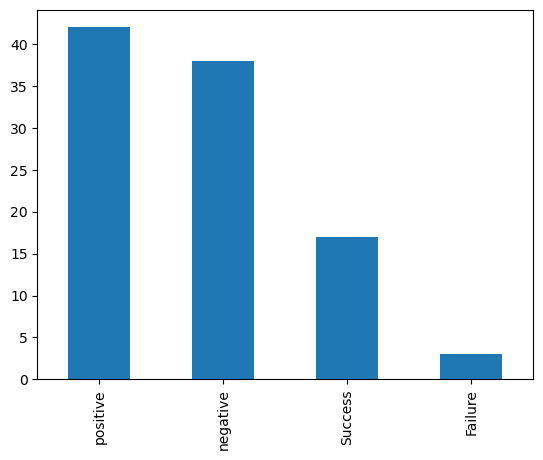

In [27]:
final=[]
curr=-1
cf=[]
#iterating for all the paresed news.........default investment amount=50000
for ticker, news_table in news_tables.items(): 
  invest=50000
  act_inv=invest
  curr=curr+1
  if(curr==1):
    break
  
  

  parsed_data=[]
  for row in news_table.findAll('tr'):
    
    title=row.a.get_text()
    date_data=row.td.text.split(' ')
    if len(date_data)==1:
      time=date_data[0]
    else:
      data=date_data[0]
      time=date_data[1]
    parsed_data.append([ticker,data,time,title])
    #creating dataframe of particular stock name
  df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])

  #doing sentiment analysis
  vader=SentimentIntensityAnalyzer()
  f=lambda title:vader.polarity_scores(title)['compound']

  #compound contains the news type
  df['compound']=df['title'].apply(f)
  dates=df.date.values
  arr=[]
  l=len(dates)
  for i in range(0,l):
    arr.append(get_date(dates,i))    #arr contains all the dates in datetime format
  # /*close=[]
  # l=len(arr)
  # count=0
  # #getting close for the day of news
  # for i in range(0,l):
  #   close.append(get_close(arr,i,stock_data[curr][2]))  
  #   print(count)
  #   count=count+1
  close=[]
  next_Closeing=[]
  high_day1=[]
  high_day2=[]
  high_day3=[]
  high_day4=[]
  high_day5=[]
  low_day1=[]
  low_day2=[]
  low_day3=[]
  low_day4=[]
  low_day5=[]
  max_mean=[]
  min_mean=[]
  open=[]
  l=len(arr)
  count=0

  #low and high of next consecutive 5 days
  for i in range(0,l):
    day=[]  
    day=get_day(arr,i,stock_data[curr][2])
    close.append(day[0])
    open.append(day[1])
    next_Closeing.append(day[2])
    high_day1.append(day[3])
    low_day1.append(day[4])
    high_day2.append(day[5])
    low_day2.append(day[6])
    high_day3.append(day[7])
    low_day3.append(day[8])
    high_day4.append(day[9])
    low_day4.append(day[10])
    high_day5.append(day[11])
    low_day5.append(day[12])
    max_mean.append(maxi_mean(day))
    min_mean.append(mini_mean(day))
    print(count)
    count=count+1
  df['Close']=close 
  df['day1_high']=high_day1
  #df['day2_high']=high_day2
  # df['day3_high']=high_day3
  # df['day4_high']=high_day4
  # df['day5_high']=high_day5
  df['day1_low']=low_day1
  # df['day2_low']=low_day2
  # df['day3_low']=low_day3
  # df['day4_low']=low_day4
  # df['day5_low']=low_day5
  # df['max_mean']=max_mean
  # df['min_mean']=min_mean
  # df['high_next']=high_day1
  # df['low_next']=low_day1
  l=len(arr)
  arima_res=[]
  a_act=[]
  compound=df.compound.values

  #using arima for cross verification
  for i in range(0,l):
    if(compound[i]==0):
      arima_res.append(0)
      a_act.append(0)
    else:
      temp=arima_pred(stock_data[curr][2],arr,i,close[i])
      arima_res.append(temp[1])
      a_act.append(temp[0])

  df['arima_value']=a_act
  df['arima_res']=arima_res
  
  predicted=[]   #insertion in which neutral not included
  prediction=[]   #intersection of arima and sentiment analysis
  l=len(arr)
  for i in range(0,l):
    if(arima_res[i]>0 and compound[i]>0):
      prediction.append('Increase')
    elif(arima_res[i]<0 and compound[i]<0):
      prediction.append('Decrease')
    else:
      prediction.append('Neutral')

  df['prediction']=prediction
  l=len(arr)
  for i in range(0,l):
    if(arima_res[i]>0 and compound[i]>0):
      predicted.append('Increase')
    elif(arima_res[i]<0 and compound[i]<0):
      predicted.append('Decrease')
    
  observation=[]     #what we expected
  actual=[]          #what actually happens
  pos=0
  a=0
  neg=0
  psuc=0
  nsuc=0
  no_of_trade=0
  prof=0
  c_arr=find_total(prediction)
  l=len(arr)

  #Backtracking to check the accuraccy of the model along with the profit got on investment
  for i in range(0,l):
    if(prediction[i]=='Neutral' and compare(close[i],max_mean[i],min_mean[i])==1):
        observation.append('positive')
        pos=pos+1
    elif(prediction[i]=='Neutral' and compare(close[i],max_mean[i],min_mean[i])==-1):
        observation.append('negative') 
        neg=neg+1
    elif(prediction[i]=='Increase' and close[i]<high_day1[i]):#arima model check needed
        observation.append('Success')
        actual.append('Increase')
        try:
          prof=profit(invest,open[i],(next_Closeing[i]+high_day1[i])/2)
          no_of_trade=no_of_trade+1
          invest=invest+prof
          print("\nprofit=",prof)
          print("Invest=",invest)
          print("\n",no_of_trade)

        except:
          a=0
          print('Except')
        psuc=psuc+1
    elif(prediction[i]=='Decrease' and close[i]>low_day1[i]):
        observation.append('Success')
        actual.append('Decrease')
        nsuc=nsuc+1
    else:
         observation.append('Failure')
         if(prediction[i]=='Decrease'):
           actual.append('Increase')
         else:
           try:
              loss=loss_cal(invest,open[i],next_Closeing[i],low_day1[i])
              invest=invest-loss
              no_of_trade=no_of_trade+1
              print("\nLoss=",loss)
              print("invest=",invest)
              print("\n",no_of_trade)
           except:
            a=0
            print("except")
           actual.append('Decrease')
    
    
    
    

  per_profit=per_prof_cal(invest,act_inv)
  df['observation']=observation
  df['observation'].value_counts().plot.bar()
  plt.savefig(stock_data[curr][0]+'_1.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
  
  x=0
  y=0
  z=0
  if c_arr[0]==0:
    x=1   
  else:
    x=c_arr[0] 
  if c_arr[1]==0:
    y=1   
  else:
    y=c_arr[1]
  if c_arr[2]==0:
    z=1  
  else:
    z=c_arr[2]  
  final.append([stock_data[curr][0],len(arr),c_arr[0],str(round(pos/x*100,2))+'%',c_arr[1],
  str(round(psuc/y*100,2))+'%',c_arr[2],str(round(nsuc/z*100,2))+'%',act_inv,no_of_trade,str(round(per_profit,2))+'%',round(invest,2)])

  df.to_csv(stock_data[curr][0]+'1.csv')
  
  
  r=confusion_matrix(actual,predicted)
  cf.append(r)

 #final result of model 
summary=pd.DataFrame(final,columns=['Stock name','Total_news_count','neutal_news_count','Increase %','positive_news_count','success %',
'negative_news_count ','success %','actual_invest','No_of_trade','profit','after_invest'])
summary.to_csv('summary.csv')  
    


 

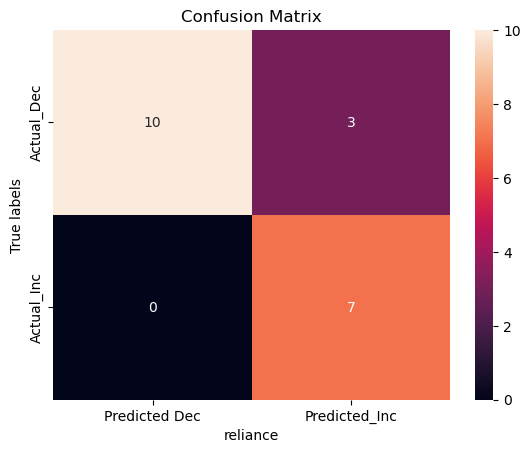

In [28]:
#confusion matrix to calculate accuraccy and percantage error
curr=0    
for i in range(0,len(cf)):
    ax= plt.subplot()   

    sns.heatmap(cf[i], annot=True, fmt='g',ax=ax);  
    ax.set_xlabel(stock_data[curr][0]);ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Predicted Dec', 'Predicted_Inc']); ax.yaxis.set_ticklabels(['Actual_Dec', 'Actual_Inc'])
    plt.savefig(stock_data[curr][0]+'_cf.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    curr=curr+1

In [29]:
summary=pd.DataFrame(final,columns=['Stock name','Total_news_count','neutal_news_count','Increase %','positive_news_count','success %',
'negative_news_count ','success %','actual_invest','No_of_trade','profit','after_invest'])
summary.to_csv('summary.csv') 